In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import random
import multiprocessing as mp
import pathos
from glob import glob
from joblib import dump, load
from IPython.display import clear_output
%load_ext autoreload
%autoreload 2
from utility import *

In [12]:
low_contours = load('./low_contours.pkl')
high_contours = load('./high_contours.pkl')#glob('part_2__Axis_z/*edges.png')

with pathos.multiprocessing.ProcessPool(6) as p:
    low_rotated_rect = p.map(lambda x: get_rotated_rect(x, isImage=False), low_contours)
    high_rotated_rect = p.map(lambda x: get_rotated_rect(x, isImage=False), high_contours)

In [13]:
low_contour_images = load('./low_contour_images.pkl')

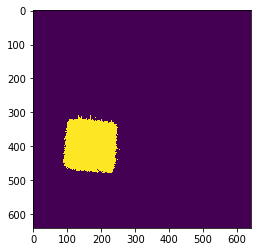

In [15]:
plt.imshow(low_contour_images[10])

In [16]:
low_angles, low_classes, low_c  = remove_outliers(np.array([x[-1] for x in low_rotated_rect]).reshape(-1, 1)
                                                  , n_classes=2)
high_angles, high_classes, high_c = remove_outliers(np.array([x[-1] for x in high_rotated_rect]).reshape(-1,1)
                                                    , n_classes=1)

In [17]:
print(np.sum(low_classes==low_c)/len(low_classes))
print(np.sum(high_classes==high_c)/len(high_classes))

0.952
1.0


In [29]:
np.where(low_classes==1-low_c)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 11]),)

In [30]:
low_mean_angle = np.mean(low_angles)
low_center = np.min([x[0] for x in low_rotated_rect], axis=0)+10
low_size = np.max([x[1] for x in low_rotated_rect], axis=0)+20

In [31]:
high_mean_angle = np.mean(high_angles)
high_center = np.min([x[0] for x in high_rotated_rect], axis=0)+10
high_size = np.max([x[1] for x in high_rotated_rect], axis=0)+20

In [32]:
_, low_classes, low_c = remove_outliers(np.array([x[1] for x in low_rotated_rect]).reshape(-1, 2))
_, high_classes, high_c = remove_outliers(np.array([x[1] for x in high_rotated_rect]).reshape(-1, 2), 1)

In [33]:
print(np.sum(low_classes==low_c)/len(low_classes))
print(np.sum(high_classes==high_c)/len(high_classes))

0.96
1.0


In [34]:
#for c, file in zip(low_classes, low_files):
def fun(args):
    file, angle = args
    #print(file, c)
    rect = get_rotated_rect(file, isImage=True)
    rect = list(rect)
    #rect[-1] = angle
    #rect = (low_center, low_size, low_mean_angle)
    img = cv2.imread(file, 0)
    img_crop, img_rot = crop_rect(img, rect)
    #plt.imshow(img_crop)
    return img_crop

In [35]:
low_files = glob('part_2__Axis_z/*edges.png')
high_files = glob('LSU_NonHIP/2.9um/*_edges.png')

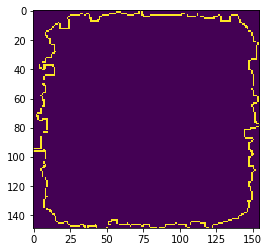

In [36]:
index = np.random.randint(len(low_files))
plt.imshow(fun((low_files[index], low_mean_angle)))

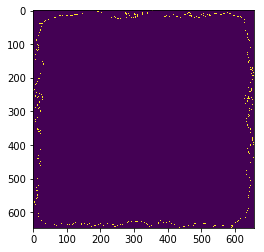

In [37]:
index = np.random.randint(len(high_files))
plt.imshow(fun((high_files[index], high_mean_angle)))

In [38]:
with mp.Pool(4) as p:
    low_cropped_images = p.map(fun, zip(low_files, [low_mean_angle]*len(low_files)))

In [39]:
with mp.Pool(4) as p:
    high_cropped_images = p.map(fun, zip(high_files, [high_mean_angle]*len(high_files)))

In [25]:
dump(low_cropped_images, 'low_cropped_images.pkl')
dump(high_cropped_images,'high_cropped_images.pkl')

['high_cropped_images.pkl']

In [26]:
high_cropped_images[100].max()

1